# Symbolic-numeric methods to solve polynomial systems

$\newcommand{C}{\mathbb{C}}$
$\newcommand{P}{\mathbb{P}}$
$\newcommand{R}{\mathbb{R}}$
$\newcommand{N}{\mathbb{N}}$
$\newcommand{Z}{\mathbb{Z}}$
$\newcommand{im}{\mathrm{im}}$
$\newcommand{coker}{\mathrm{coker}}$
$\newcommand{span}{\mathrm{span}}$
$\newcommand{ideal}[1]{\langle #1 \rangle}$
$\newcommand{DD}{\mathrm{\delta^+}}$
$\newcommand{bm}[1]{{\bf {#1}}}$
$\newcommand{Sylv}{\mathrm{Sylv}}$
$\newcommand{deg}{\mathrm{deg}}$

## Symbolic-numeric algorithms
  
  $$
  \begin{array}{c}
    \text{Polynomial} \\ \text{systems}
  \end{array}
  \xrightarrow[method]{Symbolic}
  \begin{array}{c}
    \text{Linear algebra} \\ \text{problem}
  \end{array} 
  \xrightarrow[algorithm]{Numeric}
  \begin{array}{c}
    \text{Approximation} \\ \text{of solutions}
  \end{array} 
  $$

In [ ]:
using DynamicPolynomials;
using LinearAlgebra;

@polyvar x
ff =  x^3 - 2 * x^2 - 3 * x + 1
compMat = [ 2 1 0; 3 0 1; -1 0 0 ]
sols = eigvals(compMat)
[ff(x => sols[i]) for i=1:3]

# print - ignore
println("f(x) = ", ff, "\n\nCompanion matrix"); display(compMat); println("Eigenvalues: ", sols); println("\nSolutions:"); for sol in sols; println("f($sol)\t= ", ff(x => sol)); end

We will show examples using the Julia package $\texttt{EigenvalueSolver.jl}$

$$ $$

In [ ]:
## Download and install the package
import Pkg; 
Pkg.add(url = "https://github.com/simontelen/JuliaEigenvalueSolver.git");

## Loads the package, might take time!
using EigenvalueSolver;

$$ $$

*M. R. Bender and S. Telen. "Yet another eigenvalue algorithm for solving polynomial systems." arXiv:2105.08472 (2021).*

### Solve zero dimensional systems using eigenvalues

- Consider $f_1,\dots,f_r \in S := \mathbb C[x_1,\dots,x_n]$ and
    $I := \ideal{f_1,\dots,f_r}.$

- We want $\{p \in \C^n : f_1(p) = \dots = f_r(p) = 0\}$. Assume
    finite solutions, namely $\{\zeta_1,\dots,\zeta_\delta\}$.

- The quotient $R := S / I$ describes the solution set:

   $$R = \{g + I : g \in S\}
      \qquad \text{where } g + I = h + I \iff g - h \in I $$.

   - Let $\mu_i$ be the multiplicity of $\zeta_i$ and define  $\DD := \sum_i \mu_i$.
   - It is a finite dimensional $\C$-vector space of $R \simeq \C^{\delta^+}$.

#### Eigenvalues of the multiplication maps

Given $g \in S$, consider $M_g : R \rightarrow R$, s.t. $h + I \mapsto  g \, h + I$. Then,
  
$$\mathrm{CharPol}(M_g)(\lambda) = \prod_{i=1}^\delta ( g(\zeta_i) - \lambda)^{\mu_i}.$$
  
 - The multiplication map commutes, i.e., for $h,g \in S$, $$M_h \, M_g = M_{h \, g} = M_g \, M_h$$

- **Solve system** by computing simultaneous Schur triangulation (diagonalization) of $M_{x_1},\dots,M_{x_n}$.

 - From the matrix $M_{x_i}$, we recover all the $i$-th coordinates of the solutions!

### How to compute multiplication maps

 - Monomial basis $B$ of $R$ $\longrightarrow$ $\#B = \delta^+$

   **Property/definition** for every $h \in S$, there are $f,g$ such that $h = f + g$ and
  - $f \in I$, and
  - $g \in S_B := \bigoplus_{b \in B} \C \cdot b$ and is unique.

 - Multiplication map $M_{f_0} \in \C^{\delta^+ \times \delta^+}$, for $f_0 \in S$.

   **Property/definition** for every $c \in \C^{\delta^+}$, there is $\mathrm f_c \in I$ such that
    $$\left( \sum_i c_i \, b_i \right) \, f_0 = [b_1,\dots,b_{\delta^+}] \, M_{f_0}
    \left[\begin{smallmatrix}
      c_1 \\
      \vdots \\
      c_{\delta^+}    
    \end{smallmatrix} \right]
    +
    \mathrm f_{c}
    $$

 - **Good news**: computing $M_{f_0}$ $\rightarrow$ finding $\mathrm f_c \in I$, for every $c$.
 \
   The elements $\{\mathrm f_c\}_c$ belong to finite dim subvector space of $I$
 \
   $\implies$ use linear algebra to reduce each  $\{ b_i \, f_0 : b_i \in B\}$.

## Sylvester maps 

Given monomial sets $\sigma_1,\dots,\sigma_r$, we want to study
$$ \mathrm{span}_{\mathbb C}(x^\beta \, f_i : x^\beta \in \sigma_i) $$

Consider $\Sigma$ such that for each $x^\beta \in \sigma_i$, $x^\beta \cdot f_i$ only involves monomials in $\Sigma$.

We define the **Sylvester map**

$$Sylv_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r; \Sigma} :
S_{\sigma_1} \times \dots \times S_{\sigma_r} \rightarrow S_\Sigma
$$

$$Sylv_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r; \Sigma}(g_1,\dots,g_r) := \sum_i g_i \, f_i$$

where $S_{\sigma_i} = \span_{\C}(x^\alpha : x^\alpha \in \sigma_i)$, that is, where each $g_i$ is a linear combinations of the elements in a monomial set
$\sigma_i$.

$$\im(Sylv_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r; \Sigma}) = \mathrm{span}_{\mathbb C}(x^\beta \, f_i : x^\beta \in \sigma_i)$$

## Macaulay matrices

- Matrix representation of the Sylvester map $Sylv_{f_1,\dots,f_n}^{\sigma_1,\dots,\sigma_n; \Sigma} : (g_1,\dots,g_n) \mapsto \sum_i g_i \, f_i$ 

- The **Macaulay matrix** $\mathrm Mac(f_1,\dots,f_n;\sigma_1,\dots,\sigma_r; \Sigma)$ is as follows:
 - The columns are indexed by pairs $(f_i,x^\beta)$, where $x^\beta \in \sigma_i$
 - The rows are indexed by mononomials $x^\alpha \in \Sigma$.
 - The entry of column $(i,x^\beta)$ and row $x^\alpha$ corresponds to the coefficient of $x^{\alpha}$ in $x^\beta \, f_i$.

We use the function **EigenvalueSolver.getRes()** to compute Macaulay matrices matrix.

In [ ]:
@polyvar x y

F = [
    x^2-3*x*y+2*y^2-2*x+5*y,
    -2*x*y+6*y^2-x+y+2
    ]

σ = [
     [x, y, 1],
     [x, y, 1]
    ]

Σ = [x^3, x^2*y, x*y^2, y^3, x^2, y^2, x*y, x, y, 1] # Σ = monomials([x,y], 0:3)

MacF = EigenvalueSolver.getRes(F,Σ,σ,[x, y])

# print - ignore
@polyvar f[0:2]
@polyvar …
@polyvar ⋮
display(vcat(transpose(vcat([(…)],reduce(vcat,[f[mod(i,3)+1].*σ[i] for i=1:2]))),hcat(Σ,round.(Int, MacF))))

### The transpose of the Macaulay matrix (or multiplying by left)

Given a point $p \in \C^n$, let $(p)^\Sigma$ be the vector of evaluations of every monomial in $\Sigma$ at $p$.
    
$$(p)^\Sigma \cdot \mathrm Mac(f_1,\dots,f_r;\sigma_1,\dots,\sigma_r; \Sigma)
    =
    \left( (x^\beta \, f_i)(p) : x^\beta \in \sigma_i \right)
$$

If $p$ is a solution of the system, then the vector $(p)^\Sigma$ belongs to the left kernel of the matrix.

In [ ]:
ev = (p,Σ) -> map(mon -> subs(mon,(x,y) => (p)), Σ)'

display(F); display(reduce(vcat,[f[mod(i,3)+1].*σ[i] for i=1:2])')

display(
    ev((1,1),Σ)*MacF
)
display(
    ev((2,0),Σ)*MacF
)

## Computing multiplication map of $f_0$ in $\langle f_1,\dots,f_r \rangle$

Let $B$ be a monomial basis of $R$. To compute the multiplication map of $f_0$ in
$R$, we need to rewrite any polynomial in

$$\mathrm{span}_{\mathbb C}(x^\beta \, f_0 : x^\beta \in B)$$ 

as a linear combination of polynomials involing the monomials in $B$ and polynomials in $I$.

We can use again a Macaulay matrix for this. We need to compute a Schur complement.

In [ ]:
f₀ = x+2*y+1
B = [x*y, x, y, 1]
Macf0 = EigenvalueSolver.getRes([f₀],Σ,[B],[x, y])
 
# print - ignore
pl= vcat(transpose(vcat([(…)],reduce(vcat,[f[mod(i,3)+1].*σ[i] for i=1:2]),[(⋮)],f[1].*B)),hcat(Σ,round.(Int, MacF),([(⋮) for i =1:10]),round.(Int, Macf0))); display(vcat(pl[1:7,:], ([(…) for i =1:12])' , pl[8:end,:]))

In [ ]:
f₀ = x+2*y+1
B = [x*y, x, y, 1]
Macf0 = EigenvalueSolver.getRes([f₀],Σ,[B],[x, y])

# print - ignore
pl= vcat(transpose(vcat([(…)],reduce(vcat,[f[mod(i,3)+1].*σ[i] for i=1:2]),[(⋮)],f[1].*B)),hcat(Σ,round.(Int, MacF),([(⋮) for i =1:10]),round.(Int, Macf0))); display(vcat(pl[1:7,:], ([(…) for i =1:12])' , pl[8:end,:]))

We split our Macaulay matrix in four parts. 
 - We split the columns in two groups, 
$$\{(x^\beta,f_i) : x^\beta \in \sigma_i\}_{i > 0} \text{ and } \{(x^\beta, f_0) : x^\beta \in B\}$$
 - We split the rows in the monomials in $\Sigma \setminus B$ and $\sigma_0$.

$$
\left[ 
\begin{array}{c | c}
M_{1,1} & M_{1,2} \\ 
M_{2,1} & M_{2,2}
\end{array}
\right]
$$

If $B$ is a monomial basis of $R$ the size of $M_{2,2}$ is $\prod_{i >0} \mathrm{deg}(f_i)$, i.e., the Bézout bound.

If $M_{1,1}$ invertible, the Schur complement is the multiplication map of $f_0$, $M_{f_0}$, in $R$.

$$
\left[ 
\begin{array}{c | c}
M_{1,1} & M_{1,2} \\ 
M_{2,1} & M_{2,2}
\end{array}
\right]
\, 
\left[ 
\begin{array}{c | c}
Id & - M_{1,1}^{-1} \, M_{1,2} \\ 
0 & Id
\end{array}
\right]
=
\left[
\begin{array}{c | c}
M_{1,1} & 0 \\
M_{2,1} & M_{2,2} - M_{2,1} \, M_{1,1}^{-1} \, M_{1,2}
\end{array}
\right]
$$

In [ ]:
schurCompl_f0 = Macf0[end-3:end,:] - MacF[end-3:end,:]*inv(MacF[1:6,:])*Macf0[1:6,:]

# print - ignore
pl= vcat(transpose(vcat([(…)],reduce(vcat,[f[mod(i,3)+1].*σ[i] for i=1:2]),[(⋮)],f[1].*B)),hcat(Σ,(MacF),([(⋮) for i =1:10]),[zero(rand(6,4));round.(schurCompl_f0, digits=3)])); display(vcat(pl[1:7,:], ([(…) for i =1:12])' , pl[8:end,:]))

 - The left eigenvectors of the multiplication map correspond to evaluation at the solutions.

In [ ]:
eigv = eigen(transpose(schurCompl_f0))

println("Eigenvalues")
display(eigv.values)
println("\nEigenvectors")
display(hcat(B,round.(eigv.vectors.*transpose(inv.(eigv.vectors[4,:])),digits=3)))

In [ ]:
F[1]((x,y)=>(2,0)), F[2]((x,y)=>(2,0))

- We can also solve the system using the eigenvalues. We consider a different $f_0$ and repeat the computation

In [ ]:
h₀ = 3*x-y-2

Mach0 = EigenvalueSolver.getRes([h₀],Σ,[B],[x, y])

schurCompl_h0 = Mach0[end-3:end,:] - MacF[end-3:end,:]*inv(MacF[1:6,:])*Mach0[1:6,:]

- As we want to match the eigenvalues corresponding to the same solutions, we reuse the eigenvectors.

In [ ]:
matrixVsEigen = transpose(schurCompl_h0)*eigv.vectors

newEigenvalues = [(j -> matrixVsEigen[j,i]/eigv.vectors[j,i])(
        findfirst((el -> norm(el) > 1e-6),eigv.vectors[:,i])) for i=1:4]

- Now, we just need to solve a linear system.

In [ ]:
sols = [1 2; 3 -1]^(-1)*(transpose(hcat(eigv.values, newEigenvalues)) .- [1,-2])

println("$(length(sols[1,:])) solutions")
display(hcat([x;y],sols))
for i=1:4
    println("Relative error: ", norm([F[j]((x,y) => sols[:,i]) for j=1:2])/norm(sols[:,i]))
end

### Why don't we consider the multiplication maps wrt coordinates directly?

I.e., why we don't consider $f_0 = x_i$? Numerically bad!

In [ ]:
Macx = EigenvalueSolver.getRes([x],Σ,[B],[x, y])

schurCompl_x = Macx[end-3:end,:] - MacF[end-3:end,:]*inv(MacF[1:6,:])*Macx[1:6,:]

eigv_x = eigen(transpose(schurCompl_x))
println("Eigenvalues")
display(eigv_x.values)
println("\nEigenvectors")
display(round.(eigv_x.vectors.*(transpose(inv.(eigv_x.vectors[4,:]))),digits=3))

## Choosing basis for quotient ring

In the previous example, we assumed we know:
- Which polynomials in $I$ to consider.
- A monomial basis for $R$.

#### What can we do in practice?

We choose a big enough degree $d$ and, for each $i$, we consider all monomials of degree at most  $d - d_i$, where $d_i := \deg(f_i)$, that is,
$$\sigma_i = \{ x^\beta \in S_{\leq d - d_i} \}$$

- Under good assumptions, $\mathbb C[x_1,\dots,x_n] / \langle f_1,\dots,f_r \rangle$ is isomorphic to $\mathrm{cokernel}(\mathrm{Sylv_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r; \Sigma}})$. 

 - In particular, $\mathrm{rank}(\mathrm{coker}(\mathrm{Sylv_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r; \Sigma}})) = \delta^+$

- Moreover, the set $\sigma_0$ will contain a monomial basis $B$ for $R$.

#### How to recover the monomial basis and the multiplication maps?

- We want to decide which monomials in $\sigma_0$ form a numerically good basis for $R$.

- For that, we need $\delta^+$ monomials in $\sigma_0$ which are linear independent modulo
$\mathrm{im}(\mathrm{Sylv_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r; \Sigma}}).$

- To test, we compute the image $\mathrm{Sylv}_{1}^{\sigma_0; \Sigma}$ mod $\mathrm{coker}(\mathrm{Sylv_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r; \Sigma}})$.

- This can be done using the left kernel of the Macaulay $\mathrm{Mac}({f_1,\dots,f_r};{\sigma_1,\dots,\sigma_r})$.

> Via the Schur complement, we have been doing this implicitly. $$ \small
\left[ 
\begin{array}{c | c}
Id & - M_{2,1} \, M_{1,1}^{-1}
\end{array}
\right] 
\,
\left[ 
\begin{array}{c | c}
M_{1,1} & M_{1,2} \\ 
M_{2,1} & M_{2,2}
\end{array}
\right]
=
\left[
\begin{array}{c | c}
0 &  M_{2,2} - M_{2,1} \, M_{1,1}^{-1} \, M_{1,2}
\end{array}
\right]
$$

- Numerically, we do so by computing the singular value decomposition of the matrix.

In [ ]:
Σ2 = [y^2, y*x, x^2, x, y, 1]
σ2 = [monomials([x,y],0), monomials([x,y],0:1)]

F2 = [y^2-4*x^2-2*y-8*x-3, -1e-4*x+y+1]

M2 = EigenvalueSolver.getRes(F2,Σ2,σ2,[x,y])

# print - ignore
println("New system F = (f₁,f₂)");display(F2);display(vcat(transpose(vcat([(…)],reduce(vcat,[f[mod(i,3)+1].*σ2[i] for i=1:2]))),hcat(Σ2,round.(M2,digits=10))))

In [ ]:
function getCokernel(MM)
    svdobj = svd(transpose(MM), full = true)
    firstzerosingval = length(svdobj.S) + 1
    firstzeroSingval = findfirst(sv -> sv < 1e-6 * svdobj.S[1], svdobj.S)
    if !isnothing(firstzeroSingval); rk = firstzerosingval - 1; else; rk = length(svdobj.S); end
    return transpose(svdobj.V[:, rk+1:end])
end

cokerN = getCokernel(M2)

 - From this, we can see that in this example we shouldn't choose $[y,1]$ as our basis for $\mathbb C[x,y] / \langle f_1,f_2 \rangle$.

In [ ]:
M2_1 = EigenvalueSolver.getRes([1],Σ2, [monomials([x,y],0:1)],[x,y])

N_1 = cokerN*M2_1

display(F2);display(vcat(monomials([x,y],0:1)', N_1))

- In this example, we can choose $B = [x,1]$
- In practice, we use QR with optimal pivoting to choose the set B.

 - For each $f_0 \in R_{\leq d_0}$, we have a map $\mathcal N_{f_0} := \kappa \circ \mathrm Sylv_{f_0}^B$, where
 
 $$
\bigoplus_{i \geq 1} S_{\leq d - d_i}
\xrightarrow{\mathrm{Sylv}_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r}}
S_{\leq d}
\xrightarrow{\kappa}
\mathrm{coker}(\mathrm{Sylv}_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r})
\rightarrow 0
 $$
 
 We represent $\mathcal N_{f_0}$ with a matrix
 
 $$N_{f_0} := \mathrm{leftKernel}(\mathrm{Mac}({f_1,\dots,f_r};{\sigma_1,\dots,\sigma_r})) \cdot
 \mathrm{Mac}(f_0;B)
 $$

 - Morally, $\mathcal N_{f_0}$ represents a multiplication map of $f_0$ in two different basis of $R$:
 
  - the monomials $B$ and
  - using the cokernel of Sylvester map $\mathrm{Sylv}_{f_1,\dots,f_r}^{\sigma_1,\dots,\sigma_r}$. 
  
 - To recover the solutions from eigenvectors, we need to write our multiplication maps in the same basis.
  - We do this by composing $\mathcal N_{f_0}$ with the inverse of the map $\mathcal N_{1}$.

In [ ]:
B = [x 1]

Nf = (f0 -> (cokerN*EigenvalueSolver.getRes([f0],Σ2,[B],[x,y])))

eigv2 = eigen(Nf(x+y+1) * Nf(1)^(-1))

vcat((["Eigenvalues" "Evaluations"]),hcat(eigv2.values, [((x+y+1)((x,y) => (-2,-1))), ((x+y+1)((x,y) => (0,-1)))]))

 - We can do the same for rational functions $\rightarrow$ the multiplication map of $\frac{f_0}{h_0}$ is $\mathcal N_{f_0} \circ (\mathcal N_{h_0})^{-1}$.

## Solutions at infinity

In some circunstances, eigenvalue methods lead to big numerical errors.
 
 - Consider the system $\{x^2-4\,y^2-2\,x-8\,y-3 ,-x + 2\, (\varepsilon+1) \, y-1 \}$.
   - When $\varepsilon = 0$, it has only one solution: $(-1,0)$ $$ $$
   - When $\varepsilon \neq 0$, it has two solutions: $(-1,0), \left(\frac{3 \, \varepsilon + 4}{\varepsilon}, \frac{2}{\varepsilon} \right)$

In [ ]:
@polyvar ε

F3eps = [x^2-4*y^2-2*x-8*y-3, -x+2*(ε+1)*y-1.]

println("We solve the system \t $F3eps \nby replacing x by 2*(ε+1)*y-1\n")
println(
    
    subs(x^2-4*y^2-2*x-8*y-3, x => 2*(ε+1)*y-1)
)
println("\nWhen ε = 0, the system has only one solution")

## Solutions at infinity

In some circunstances, eigenvalue methods lead to big numerical errors.
 
 - Consider the system $\{x^2-4\,y^2-2\,x-8\,y-3 ,-x + 2\, (\varepsilon+1) \, y-1 \}$.
   - When $\varepsilon = 0$, it has only one solution: $(-1,0)$ $$ $$
   - When $\varepsilon \neq 0$, it has two solutions: $(-1,0), \left(\frac{3 \, \varepsilon + 4}{\varepsilon}, \frac{2}{\varepsilon} \right)$ $$ $$
   - However, when $\varepsilon \rightarrow 0$, the second solutions goes to $(\infty,\infty)$. $$ $$
   - **Big issue**: regardless of algorithm, some eigenvals of the mult. maps are huge ($f_0(\infty,\infty)$)!
    - Somewhere, we will invert a nearly singular matrix.
    - Can affect the precision of every computed solution, not only the sols going to infinity.

In [ ]:
Σ3 = monomials([x,y],0:2); σ3 = [monomials([x,y],0), monomials([x,y],0:1)]

err = 1.e-5
F3 = subs(F3eps,ε => err)

M3 = EigenvalueSolver.getRes(F3,Σ3,σ3,[x,y])

cokerM3 = getCokernel(M3)

M31 = EigenvalueSolver.getRes([1],Σ3,[monomials([x,y],0:1)],[x,y])
N3_1 = cokerM3*M31

f0 = rand(3)'*monomials([x,y],0:1);
M3f0 = EigenvalueSolver.getRes([f0],Σ3,[monomials([x,y],0:1)],[x,y])
N3_f0 = cokerM3*M3f0

# print - ignore
display(F3); println("We can not choose a monomial basis"); display(vcat(transpose([x;y;1]), N3_1)); println("However, the picture is different if we multiply by random f₀"); display(vcat((f[1].*[x,y,1]'), N3_f0)); 

#### This problem force us to change the strategy

- We want to get coordinates to write solutions at infinity  $$ $$

- Our problem is that the solution space $\mathbb C^n$ is not compact.  $$ $$

- We will work in a **bigger solutions space $\mathbb P(\mathbb C^n)$**, which is **compact**.  $$ $$

- Algebraically, we need a system of **homogeneous** equations such that, restricted to $\mathbb C^n$, they define the same ideal than our system. 

- We will consider the homogenization of our input equations: 

  - Given $f \in \mathbb C[x_1,\dots,x_n]$ of degree $d$, its homogenization is 
  
  $$f^h := x_0^d \cdot f\left(\frac{x_1}{x_0},\dots,\frac{x_1}{x_0}\right) \in \mathbb C[x_0,x_1,\dots,x_n]$$ 
     > $$f := x_1^2 + x_2 + 1 \rightarrow f^h = x_1^2 + x_0 \, x_2 + x_0^2$$
  
  - Given a system $F = (f_1,\dots,f_r) \in \mathbb C[x_1, \dots, x_n]^r$, we will solve 
  
  $$F^h = (f^h_1,\dots,f^h_r) \in \mathbb C[x_0,x_1, \dots, x_n]^r$$

  - We can recover every original solution: for every $(1 : p_1 : \dots : p_n) \in \mathbb C^n \subset \mathbb P(\mathbb C^n)$, 
  
  $$F(p_1,\dots,p_n) = F^h(1 : p_1 : \dots : p_n)$$. 
 
  - Solutions at infinity of $F$ $\subseteq$ solutions of $F^h$ of the form $(0 : p_1 : \dots : p_n) \in \mathbb P(\mathbb C^n)$.

- **Extremely important:** Homogenizing the input equations could lead to a non-zero dimensional system, which kills our strategy (no multiplication maps).

- In what follows, we will **assume that the solutions of $F^h$ at infinity are finite!**

 - In this case, we have that for big enough degree $d$,
 
 $$\left(\mathbb C[x_0,x_1,\dots,x_n] / \langle F^h \rangle\right)_d = \mathbb C [\text{Solutions of }F^h]$$.
 
 - Smallest of degree $d$ satisfying this condition $\rightarrow$ **Castelnuovo-Mumford regularity**. $$ $$
 - If $F^h$ involves only $n$ equations, geometrically we have a **complete intersection**
   - the Castelnuovo-Mumford regularity is $d_{mac} = \sum_i \mathrm{degree}(f_i) - n + 1$.

#### Going back to our example, we observe that
 - **Bézout bound**: our homogenized system has exactly two solutions (counting multiplicity):
     $$\begin{array}{c c c}
 (-1,0) & \rightarrow & (-1 : 0 : 1) \\
 \left(\frac{3 \, \varepsilon + 4}{\varepsilon} , \frac{2}{\varepsilon}\right) & \rightarrow & (3 \, \varepsilon + 4 : 2 : \varepsilon)
 \end{array}$$.
 
 - The Macaulay matrix does not change if we homogenize the equations!

In [ ]:
@polyvar z

Σ3hom = monomials([x,y,z],2)
σ3hom = [monomials([x,y,z],0), monomials([x,y,z],1)]

homog = ((f,v=z) -> (d -> sum(mm -> mm*v^(d - degree(mm)),terms(f)))(maximum(degree.(terms(f)))))

err = 1.e-5
F3hom = homog.(subs(F3eps,ε => err))

M3hom = EigenvalueSolver.getRes(F3hom,Σ3hom,σ3hom,[x,y,z]);

cokerM3hom = getCokernel(M3hom)

# print - ignore
println("Macaulay matrix for affine system"); display(vcat(transpose(vcat([(…)],reduce(vcat,[f[mod(i,3)+1].*σ3[i] for i=1:2]))),hcat(Σ3,(M3))));
println("Macaulay matrix for homogenization"); display(vcat(transpose(vcat([(…)],reduce(vcat,[f[mod(i,3)+1].*σ3hom[i] for i=1:2]))),hcat(Σ3hom,(M3hom))));    

 - The matrix $N_{x_0}$ is nearly singular:
 
  - $x_0$ vanishes at the solutions at infinity! $\implies$ $0$ is eigenvalue
 
 - In affine setting, this matrix IS $N_1$ !

In [ ]:
N3hom_z = cokerM3hom*(EigenvalueSolver.getRes([z],Σ3hom,[[x,y,z]],[x,y,z]))

println("Try to construct Matrix Nz ->  rank(Nz) ~ 1"); display(vcat([x,y,z]', N3hom_z))

 - We will compute the multiplication maps for rational functions $\frac{f_0}{h_0}$ via $N_{f_0} \cdot N_{h_0}^{-1}$, where $h_0$ does not vanish at the solutions of $F^h$. 
 
 - If we fix $h_0$ and compute $n+1$ multiplication maps for $\frac{f^{0}_0}{h_0},\dots,\frac{f^{n}_0}{h_0}$, for random linear forms $f^{0}_0,\dots,f^{n}_0$, we can recover the coordinates of the solutions.

In [ ]:
fh0 = rand(3)'*monomials([x,y,z],1);
h0 = rand(3)'*monomials([x,y,z],1);

M3homf0 = EigenvalueSolver.getRes([fh0],Σ3hom,[monomials([x,y,z],1)],[x,y,z])
M3homh0 = EigenvalueSolver.getRes([h0],Σ3hom,[monomials([x,y,z],1)],[x,y,z])

multf0divg0 = (cokerM3hom*M3homf0)[:,[1,2]]*(cokerM3hom*M3homh0)[:,[1,2]]^(-1)

vcat(["Eigenvals M_{f₀/h₀}" "Evals f₀/h₀ at sols"],hcat(sort(eigen(multf0divg0).values), sort([(fh0/h0)((x,y,z) => sol) for sol in [((3*err+4), 2, err), (-1,0,1)] ])))

- The function **EigenvalueSolver.solve_CI_dense()** implements this approach.

- Using **EigenvalueSolver.get_residual()**, we can measure how good are our approximations by computing the relative backward error,

  >Relative backward error of $\sum_\alpha c_\alpha \, x^\alpha$ at $p \in \mathbb C^n$ is $$ $$
  >$$\frac{|\sum_\alpha c_\alpha p^\alpha|}{1 + \sum_\alpha |c_\alpha p^\alpha|}$$

In [ ]:
err = 1.e-15
F3 = subs(F3eps,ε => err)

@time sol = EigenvalueSolver.solve_CI_dense(F3,[x,y]; DBD = false, verbose = true);

BWEs = EigenvalueSolver.get_residual(F3,sol,[x,y]) 
BWE = maximum(BWEs)

### Solving a random system

- Let's now solve a random system given by two plane curves of degree $30$.
- We can construct it using the function **EigenvalueSolver.getRandomSystem_dense()**.
- By Bézout's theorem, the number of solutions of the system is $30^2 = 900$.

In [ ]:
planeCurves = EigenvalueSolver.getRandomSystem_dense([x,y],[30,30])

@time sol = EigenvalueSolver.solve_CI_dense(planeCurves,[x,y]; DBD = false, verbose = true);

println("\nMaximum relative backward error: ", 
maximum(EigenvalueSolver.get_residual(planeCurves,sol,[x,y])))

### Overdetermined systems

- We say that a system $(f_1,\dots,f_r)$ is overdetermined when $r > n$. $$ $$

- General overdetermined systems have no solutions, $$ $$

- In practice, we deal with specific cases where they do.

- **Important**: The eigenvalue method works faster for overdetermined systems! $$ $$
 - Castelnuovo-Mumford regularity tends to decrease when we add new equations $$ $$
 - Hence, we solve our system using smaller Macaulay matrices.

To illustrate this, we construct an overdetermined system by fixing the solutions and the degree of the equations.

We use the function **EigenvalueSolver.getVanishingPolynomials()**.

In [ ]:
mons = monomials([x,y],0:5)
pts = [randn(Float64,2) for i = 1:10]
 
sysOD = EigenvalueSolver.getVanishingPolynomials(pts, mons, [x,y];augm_prec = false)[1];

sysOD[1]

#### First we solve a subsystem

- We take only three equations and solve the system.
- It has 10 solutions, but we need to consider the Macaulay matrix at degree 7

In [ ]:
sol = EigenvalueSolver.solve_OD_dense(sysOD[1:3],[x,y];verbose=true)

println("\nNumber of solutions: ",length(sol))
println("\nMaximum relative backward error: ", maximum(EigenvalueSolver.get_residual(sysOD[1:3],sol,[x,y])))

#### Now we solve the full system

- We only need to consider the Macaulay matrix at degree 5 !

In [ ]:
@time sol = EigenvalueSolver.solve_OD_dense(sysOD,[x,y];verbose=true)

println("\nNumber of solutions: ",length(sol))
println("\nMaximum relative backward error: ", 
maximum(EigenvalueSolver.get_residual(sysOD,sol,[x,y])))

### Further considerations

- To speed up computations, it is possible to compute $\mathrm{coker}(\mathrm{Sylv}_{d})$ using $\mathrm{coker}(\mathrm{Sylv}_{d-1})$. This approach leads to an iterative *degree by degree* algorithm.

  - If we run **solve_CI_dense()** with the optional parameter *DBD = true*, it will follow this strategy. $$ $$

- We have a criterion to check at which degree we can solve the system by recovering (almost)  multiplication maps.

In [ ]:
sol = EigenvalueSolver.solve_CI_dense(sysOD[1:2],[x,y];verbose=true,DBD=true);

### When we can use this method?

- The Macaulay matrix of the systems before and after homogenization are exactly the same.

- This tell us that our method works if and only if the homogenization of our input system has a finite number of solutions!

- This assumption makes sense for dense square systems (Bézout theorem).
> We say that a polynomial $f$ is dense if the coefficient of every monomial of degree $\leq \deg(f)$ is non-zero.

- However, if the system is sparse, the homogenization most probably won't have finite solutions
\
  In this case, the rank of the cokernel of the Macaulay matrix will keep growing! $\rightarrow$ We won't be able to solve the system.

In [ ]:
Fsp = rand(3,5)*[x^2, x, y, z, 1]; display(Fsp)

@polyvar w
FspAtInf = [subs(pols,w => 0) for pols in homog.(Fsp,w)]

println("Random system at infinity: \n", FspAtInf, "\n\n The projective line {[0 : p : q : 0] : (p,q) ∈ P^1} is always solution\n\n")

push!(Fsp,x+y+2*z-1.0)
for i = 2:10
    Σit = monomials([x,y,z],0:i)
    σit = [monomials([x,y,z],0:(i-2)) for j=1:3]
    push!(σit,monomials([x,y,z],0:(i-1)))
    MacIt = EigenvalueSolver.getRes(Fsp,Σit,σit,[x,y,z])
    print("Dim of coker at degree $i -> ",length(monomials([x,y,z],0:i)) - rank(MacIt[:,1:end - length(monomials([x,y,z],0:i-1))]))
    println("\t is N_{f_0} invertble? ", length(monomials([x,y,z],0:i)) == rank(MacIt))
end

## Solving sparse systems

- Until now, we assumed that when we homogenize the system, it has no higher dimensional solutions at infinity.

- This assumption makes sense for dense square systems (Bézout theorem).

- However, for sparse system, we can not assume this.

### What is a sparse polynomial system?

- **Newton polytope** of $f =\sum_{\alpha} c_\alpha {\bf x}^\alpha$ $\longrightarrow$ Convex hull of $\{ \alpha : c_\alpha \neq 0 \}$.

- **Sparse polynomial** $\longrightarrow$ Its Newton polytope is ``small''.
  $\newcommand{ingreen}[1]{\color{green}{#1}}$ $\newcommand{inblue}[1]{\color{blue}{#1}}$ $\newcommand{bm}[1]{{#1}}$
  
  $$
    \begin{array}[t]{r r}
    1 + xy + x^2 y + x^2 y^2 + x^3 y = &
    \begin{array}[t]{l}
      \ingreen{\bm{1}} + \bm{0} \cdot \inblue{x} + \bm{0} \cdot \inblue{y} + \bm{0} \cdot \inblue{x^2} + \ingreen{\bm{x y}} + \bm{0} \cdot \inblue{y^2} + \\
      \bm{0} \cdot \inblue{x^3} +  \ingreen{\bm{x^2 y}} + \bm{0} \cdot \inblue{x y^2}  + \bm{0} \cdot \inblue{y^3} + \\
      \bm{0} \cdot \inblue{x^4} + \ingreen{\bm{x^3 y}}  + \ingreen{\bm{x^2 y^2}} + \bm{0} \cdot \inblue{x y^3} + \bm{0} \cdot \inblue{y^4}
    \end{array}
    \end{array}
    $$
    
<div>
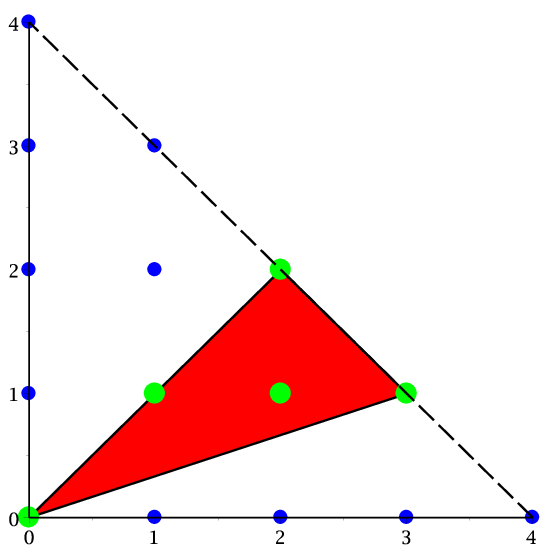
</div>

- **Unmixed sparse system** $\longrightarrow$ Polynomials with equal Newton polytope.

<table width="90%" style="text-align:center">
  <tr>
    <th>$f_1 = 1 + xy + x^2 y + x^2 y^2 + x^3 y$</th>
    <th>$f_2 = 1 + 2 \, xy - x^2 y  + x^2 y^2 - 2 \, x^3 y$</th>
    <th>$f_3 = 2 + 3 \, xy + x^2 y  x^2 y^2 + x^3 y$</th>
  </tr>
  <tr>
    <td>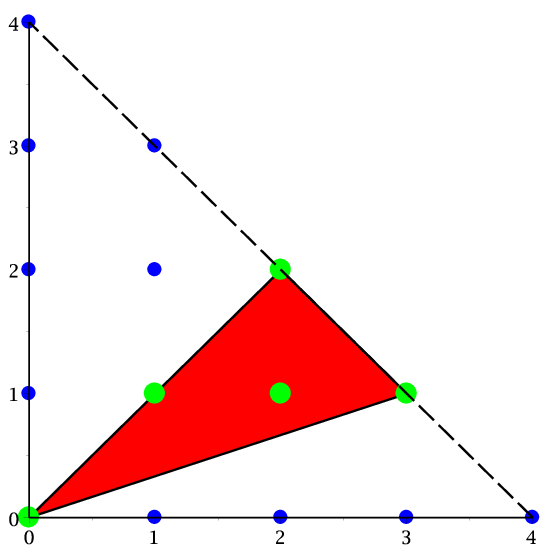</td>
    <td>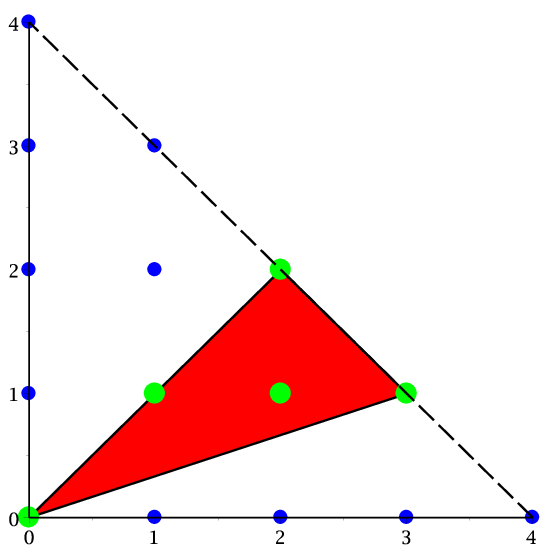</td>
    <td>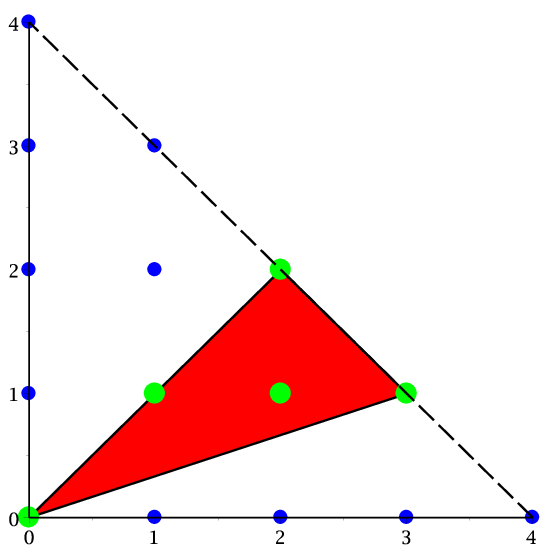</td>
  </tr>
</table> 

- **Mixed sparse system** $\longrightarrow$ Polynomials with different Newton polytope.
            
 <table width="90%" style="text-align:center">
  <tr>
    <th>$f_1 = 1 + xy + x^2 y + x^2 y^2 + x^3 y$</th>
    <th>$f_2 = 1 + x y + x y^2 + x y^3$</th>
    <th>$f_3 = 1+ x+ x y + x^2 y + x^2 y^2$</th>
  </tr>
  <tr>
    <td>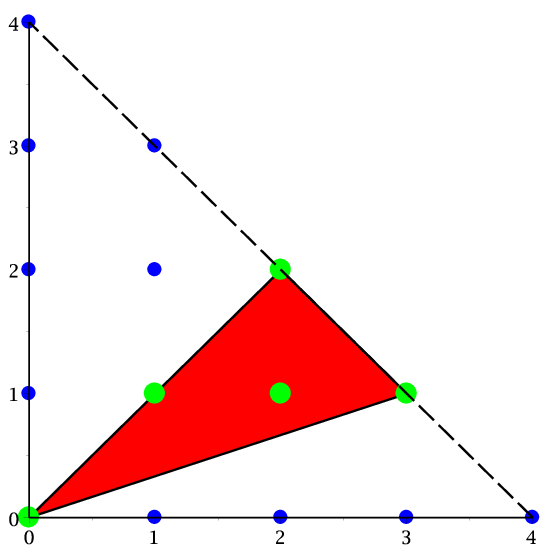</td>
    <td>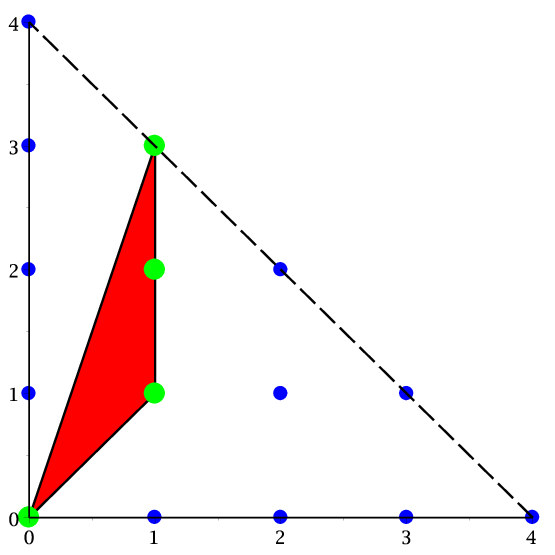</td>
    <td>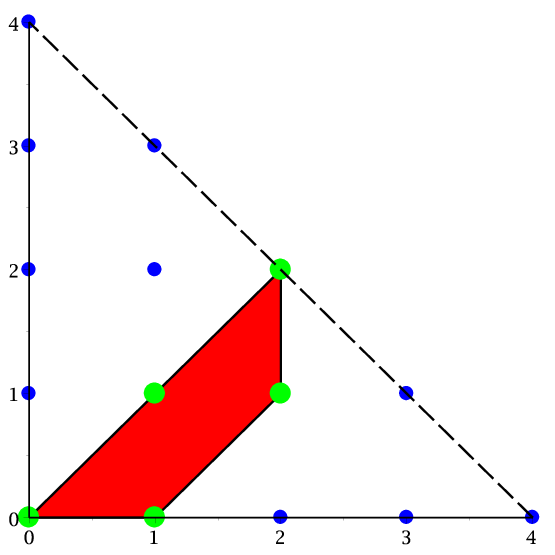</td>
  </tr>
</table> 

- Given an integer polytope $A \subset \R^n$, 
$$
S_A := \mathrm{span}_\C(x^\alpha \in S: \alpha \in A)
$$.

- Given $f \in S_A$, $g \in S_B$, we have that $f \, g \in S_{A+B}$, where $A+B$ is the Minkowski sum
$$P + Q \{\alpha + \beta : \alpha \in P, \beta \in Q\}$$
 <table style="text-align:center">
  <tr>
    <td>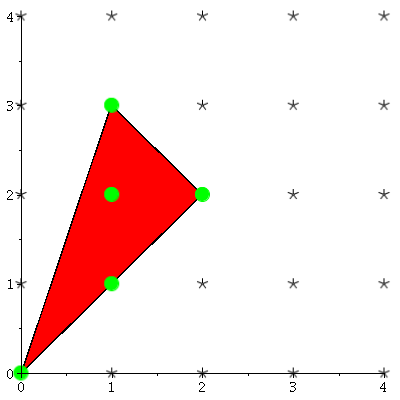</td>
      <td>+</td>
      <td>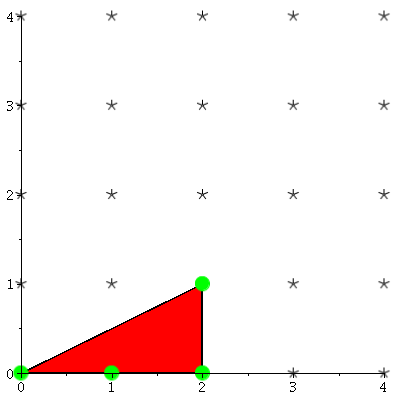</td>
      <td>=</td>
    <td>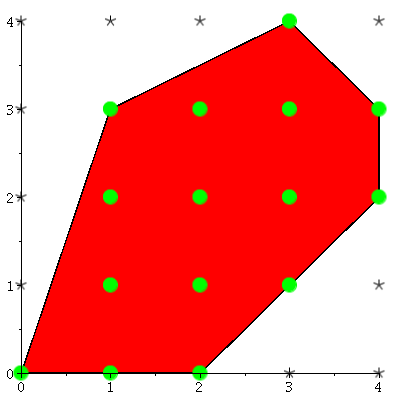</td>
  </tr>
</table> 
$$ $$

- We have $\C[x_1,\dots,x_n]_{\leq d} = S_{d \, \Delta_n}$, where $\Delta_n$ is the $n$-dimensional standard simplex.

If we have sparse polynomials $f_1,\dots,f_r$ and $r+1$ integer polytopes $A_1,\dots,A_r,B$ such that, for each $i$, $NP(f_i) + A_i \subseteq B$, we have the Sylvester map as 
  
$$Sylv_{f_1,\dots,f_r}^{A_1,\dots,A_r;B} : (g_1,\dots,g_r) \mapsto \sum_i g_i \, f_i$$
  
where $g_i \in S_{A_i}$ and $g_i \, f_i \in S_{B}$.

- In the previous algorithm (dense case)
  - We restricted to the case
   - $f_i \in S_{d_i \, \Delta_{n}}$,
   - $A_i = (d - d_i) \, \Delta_{n}$, and 
   - $B = d \, \Delta_n$
  
 - Moreover, in the square case, we considered $d = \sum_i d_i - n + 1$

We fix $n$ integer polytopes $P_1,\dots,P_n \subset \R^n$ and consider a generic sparse system 
$$(f_1,\dots,f_n) \in S_{P_1} \times \dots \times S_{P_n}.$$

- **BKK theorem:** the number of solutions of the system in $(\C \setminus \{0\})^n$ is
$$
\mathrm{MixedVolume}(P_1,\dots,P_n) = \sum_{I \subseteq \{1,\dots,n\}} 
(-1)^{n - \# I} \; \# \left(\left(\sum_{i \in I} P_i \right) \cap \Z^n \right)
$$

- In the same spirit, we can generalize the Macaulay bound.
 - Let $P_0 = \Delta_n$ and consider a generic linear form $f_0$. Consider
    $$A_i = \sum_{\substack{j\neq i}} P_i \qquad \text{and} \qquad
    B = \sum_{\substack{0 \leq j \leq n}} P_i.$$
 - **Theorem:** $\qquad$ The corank of $\Sylv_{f_1,\dots,f_n}^{A_1,\dots,A_n;B}$ is $\mathrm{MixedVolume}(P_1,\dots,P_n)$. $$ $$
 
  - **Theorem:** $\qquad$ $\Sylv_{f_0,f_1,\dots,f_n}^{A_0,A_1,\dots,A_n;B}$ is surjective
   
   
- Replacing these maps by the ones in dense ones $\rightarrow$ solve generic sparse systems!

We can solve square sparse systems using the function **EigenvalueSolver.solve_CI_mixed()**


 <table>
  <tr>
    <td>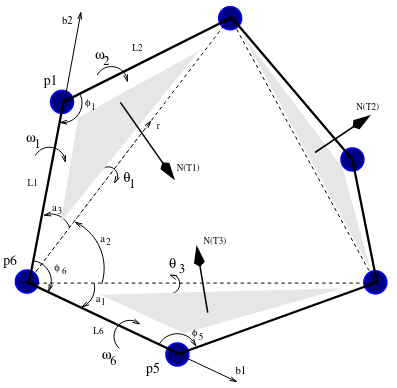 - Config of Cyclohexane - </td>
    <td style="font-size:120%"> Square sparse mixed system, coming from molecular biology [1, Section 3.3].
    </br></br>
        [1] I. Z. Emiris and B. Mourrain. "Computer algebra methods for studying and computing molecular conformations". Algorithmica, 25(2):372–402, 1999.</td>
  </tr>
</table> 

In [ ]:
@polyvar s[1:3]
β = [-13 -1 -1 24 -1; -13 -1 -1 24 -1; -13 -1 -1 24 -1]

mons1 = [1 s[2]^2 s[3]^2 s[2]*s[3] s[2]^2*s[3]^2]
mons2 = [1 s[3]^2 s[1]^2 s[3]*s[1] s[3]^2*s[1]^2]
mons3 = [1 s[1]^2 s[2]^2 s[1]*s[2] s[1]^2*s[2]^2]

Fmol = [β[1,:]'*mons1';β[2,:]'*mons2';β[3,:]'*mons3'][:]

display(Fmol)

In [ ]:
display(Fmol)

@time sol, A₀, E, D = EigenvalueSolver.solve_CI_mixed(Fmol,s;verbose=true)

BWEs = EigenvalueSolver.get_residual(Fmol,sol,s)
BWE = maximum(BWEs)
println("Maximal backward error $(BWE)")

### How big are these matrices?

- Let us concentrate in dense systems again:
  - Our previous algorithm for sparse system consider $B = (\sum_{i \geq 1} \deg(f_i) + 1) \cdot \Delta_n$
  - However, our previous dense algorithm will consider $B = (\sum_{i \geq 1} \deg(f_i) - n + 1) \cdot \Delta_n \qquad$   (Macaulay bound)


- This is a great computational disadvantage, as we work with bigger matrices.


- In general, the smallest polytopes $A_0,\dots,A_n,B$ that we can consider are determined by properties of the Newton polytopes of $f_1,\dots,f_n$. 


- Related to problem of computing regularity of complete intersections in a toric variety.

- In some cases, we know some better bounds, e.g., in the **unmixed case**.

  - Fix a polytope $P$ and integers $d_1,\dots,d_n$. 
  
  - Consider an unmixed polynomial system $(f_1,\dots,f_n)$ where $f_i \in S_{d_i \cdot P}$.
  
  - If the BKK bound is tight for this system, then we can consider
  
  $$B = \left(\sum_{i \geq 1} \deg(f_i) - \mathrm{Codegree}(P) + 2 \right) \, P $$
  
  - The codegree of $P$ is the smallest $\lambda \in \N$ such that $\lambda \cdot P$ has an integer point in its relative interior.
    - For example, the codegree of $\Delta_n$ is $n+1$ $\quad \longleftarrow \quad $ Macaulay bound!
  
  - The function **EigenvalueSolver.solve_CI_unmixed()** takes into account this improvement.

In [ ]:
A = [0 0; 1 0; 1 1; 0 1; 2 2] # monomials whose convex hull is the polytope P
d = [5;12] # equation i has support inside d[i]*P

Funm = EigenvalueSolver.getRandomSystem_unmixed([x,y],A,d)

@time sol, A₀, E, D = EigenvalueSolver.solve_CI_unmixed(Funm,[x,y],A,d; verbose = true)

println("\nMaximal backward error $(maximum(EigenvalueSolver.get_residual(Funm,sol,[x,y])))")

## Solutions at infinity, once again

As in the dense case, sparse polynomial systems can also have solutions at infinity.  Consider the following system in $\C[x,y]$,
  $$\left\{\begin{array} \
  f := y^2+y+x+1 \\ g := - y^2+ 2\, y - x+3 \end{array}\right.$$

It has only one solution, $[x = -21, y = 4]$. However, BKK bound theorem $2$. Let's find it!

In [ ]:
A = [0 0; 1 0; 0 1; 0 2]

coeffF = [1 1 1 1 ; 3 -1 -2 -1]

monsF = EigenvalueSolver.exptomon(A,[x,y])
println(monsF)

F = coeffF*monsF # F = [y^2+y+x+1,- y^2-2*y - x+3]

display(F)

@time sol, A₀, E, D = EigenvalueSolver.solve_CI_unmixed(F,[x,y],A,[1,1]; verbose = true)

println("\nMaximal backward error $((EigenvalueSolver.get_residual(F,sol,[x,y])))")

In [ ]:
@polyvar t

Ft = subs.(F,(x,y) => (t^2*x,t*y))

display(Ft)

for i = 1:8
    println("$t = 10^$i \t ",subs.(Ft,(x,y,t) => (x,y,10^i))/(10^i)^2) 
end
println("\n")
for i = 1:8
    println("$t = 10^$i, F(-t^2, t)/t^2 = ", subs.(Ft,(x,y,t) => (-1,1,10^i))/(10^i)^2,)
end

In [ ]:
Σ = EigenvalueSolver.exptomon(D,[x,y])
σ = map(ee -> EigenvalueSolver.exptomon(ee,[x,y]),E[1:end-1])

MacF = EigenvalueSolver.getRes(F,Σ,σ,[x, y])

evt = ev((-1*t^2,1*t),Σ)

println("\t",evt',"* 1/t^4")
display(vcat(transpose(vcat([(…)],reduce(vcat,[f[mod(i,3)+1].*σ[i] for i=1:2]))),hcat(Σ,round.(Int, MacF))))
println("=")

display(subs.(reduce(vcat,[F[i].*σ[i]./t^4 for i=1:2]),(x,y) => (-t^2,t)))

println("→ 0, when t → ∞")

println("\n\n We conclude that, ")
display(div.(evt,t^4))
println("belongs to cokernel of Mac")

# Wrapping up

- Symbolic-numeric algorithm reduce problem to linear algebra and solve it numerically.

- Solve polynomial systems by computing eigenvalues of multiplication maps.

- Approximate these maps using Macaulay matrices $\rightarrow$ size depends on (Castelnuovo-Mumford) regularity.

- Approach works faster for overdetermined systems.

- Correctness depends on the solutions at infinity.

- You can play with these algorithms using *EigenvalueSolver.jl*
\
https://github.com/simontelen/JuliaEigenvalueSolver